In [1]:
# importing neccessary libraries 
from matplotlib import pyplot as plt 
import numpy as np 
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd 
import plotly.express as px

##### data spans from the 26th of May, 2008 to the 30th of April, 2021

* The “High” column represents the highest price in a day.
* The “Low” column represents the lowest price in a day.
* The “VWAP” column represents the volume-weighted average price.

## Load Dataset

In [2]:
df = pd.read_csv("Resources/dataset.csv", parse_dates=["Date"])
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3201 non-null   datetime64[ns]
 1   Symbol              3201 non-null   object        
 2   Series              3201 non-null   object        
 3   Prev Close          3201 non-null   float64       
 4   Open                3201 non-null   float64       
 5   High                3201 non-null   float64       
 6   Low                 3201 non-null   float64       
 7   Last                3201 non-null   float64       
 8   Close               3201 non-null   float64       
 9   VWAP                3201 non-null   float64       
 10  Volume              3201 non-null   int64         
 11  Turnover            3201 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  3201 non-null   int64       

In [4]:
print("Earliest date: ", df["Date"].min())
print("Latest date: ", df["Date"].max())

Earliest date:  2008-05-26 00:00:00
Latest date:  2021-04-30 00:00:00


## Preprocessing of the data

In [5]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [6]:
new_idx = pd.date_range("2008-05-26", "2021-04-30", freq="1D")
df = df.reindex(new_idx)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446.0,1.726368e+14,NaN,908264.0,0.2888
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144.0,2.488370e+14,NaN,677627.0,0.1558
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759.0,2.837530e+14,NaN,774895.0,0.1689
2008-05-29,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302.0,2.982921e+14,NaN,1006161.0,0.2225
2008-05-30,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669.0,1.945929e+14,NaN,462832.0,0.1514


## Data vs Volume plot

In [7]:
sns.set_theme()
sns.set(rc={'figure.figsize':(15,8)})
fig = px.line(df, x='Date', y="Volume")
fig.show()

## Data vs High Price of the Day plot

In [8]:
fig = px.line(df, x='Date', y="High")
fig.show()

## Simple Moving Average (SMA) for 10 days and 20 days 

##### the moving average smooths out short-term price fluctuations, and filters out the noise (outlier data that could confuse the model)

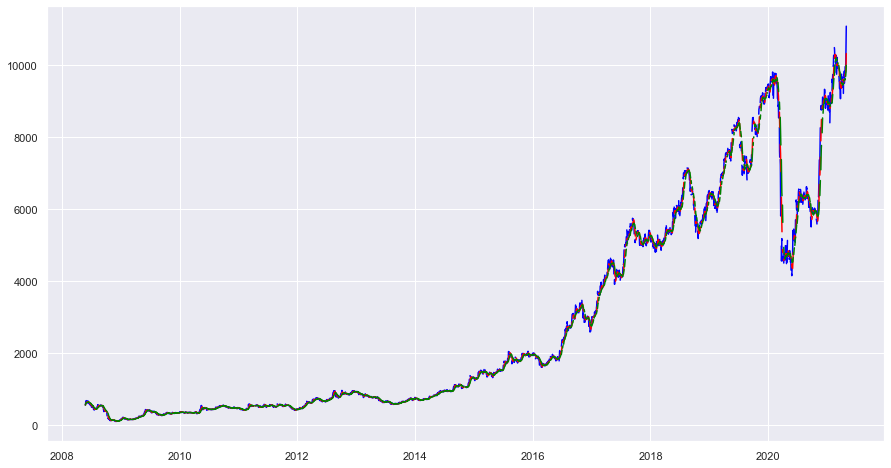

In [9]:
df_sma=df.copy()
df_sma['SMA_10']=df_sma.VWAP.rolling(10, min_periods=1).mean()
df_sma['SMA_20']=df_sma.VWAP.rolling(20, min_periods=1).mean()

plt.plot(df_sma['Date'], df_sma['VWAP'], color='blue')
plt.plot(df_sma['Date'],df_sma['SMA_10'], color='red')
plt.plot(df_sma['Date'],df_sma['SMA_20'], color='green')
plt.show()

## Autocorrelation plot

##### The measure of autocorrelation represents the relationship between the current value of a variable with its past value

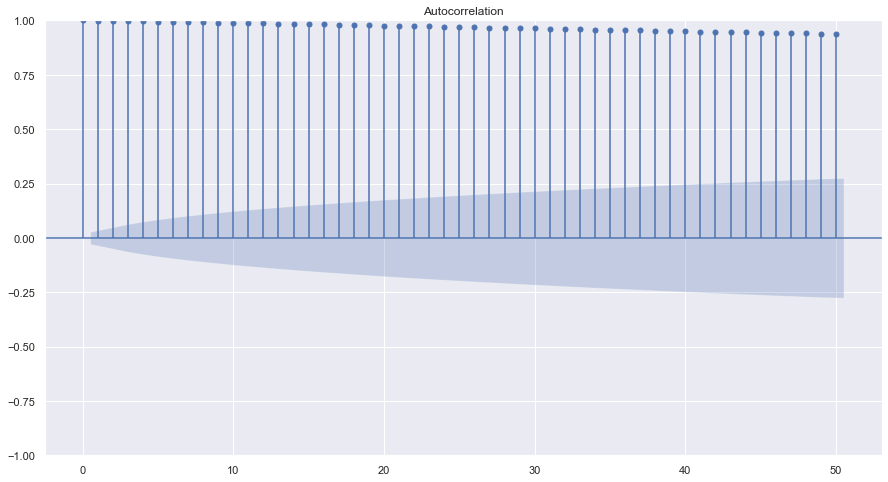

In [10]:
df.isnull().sum()
df['VWAP'].interpolate(method='linear',axis=0,inplace=True)
plot_acf(df['VWAP'], lags=50)
plt.show()

## Heatmap

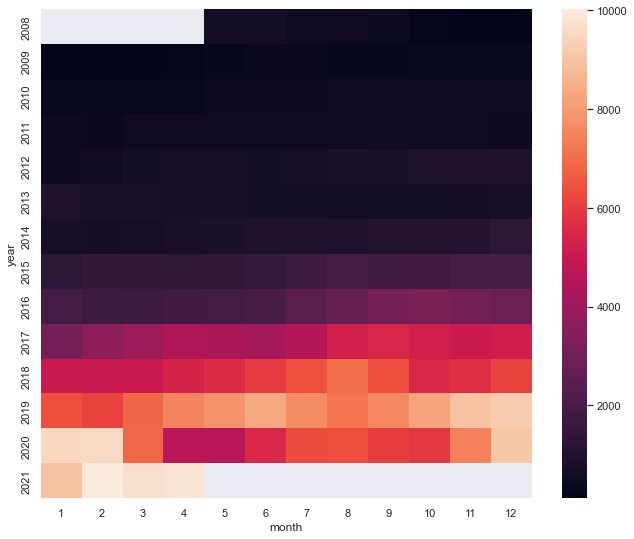

In [11]:
df_temp=df.copy()
df_temp['day'] = df_temp.index.day
df_temp['month'] = df_temp.index.month
df_temp['year'] = df_temp.index.year

df_m=df_temp.groupby(['month', 'year']).mean()
df_m
df_m=df_m.unstack(level=0)
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m['VWAP'])
plt.show()